In [1]:
import json
import pandas as pd
from gensim import corpora, models

In [2]:
import os
import glob
import re

In [3]:
mes_list = []
input_path = 'C:/Users/msi/Desktop/학교/텍스트 마이닝/assignment3/국립국어원 메신저 말뭉치(버전 1.0)'
for input_file in glob.glob(os.path.join(input_path, 'M*')):
    with open(input_file, 'r', encoding = 'UTF-8') as f:
        json_data = json.load(f)
        mes_list.append(json_data)

In [4]:
print('메신저 말뭉치의 document의 개수는 {0}개이다'.format(len(mes_list)))

메신저 말뭉치의 document의 개수는 4203개이다


In [5]:
type(mes_list)

list

In [6]:
def givemetext(doc):
    chats = doc['document'][0]['utterance']
    chat_list = []
    for chat in chats:
        chat_list.append(chat['form'])
    
    join_chat = ' '.join(chat_list)
    

    join_chat = re.sub('[-=.,#/?!:$%{}…ㅠ~ㅜㅋㅎㅌ><ㄷname^ㄱㄴㄲ;12]', '', join_chat)
    return join_chat

In [7]:
from konlpy.tag import *

In [8]:
terms = []
for mes in mes_list:
    okt = Okt()
    chat = givemetext(mes)
    tokens = okt.nouns(chat)
    terms.append(tokens)

In [9]:
dictionary = corpora.Dictionary(terms)

In [10]:
corpus = [dictionary.doc2bow(term) for term in terms]

### tfidf  계산

In [11]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

### LDA 분석

#### 분석에 앞서 나뉘어진 토픽에 해당되는 단어들을 보고 한번 더 걸러주는 작업을 시행

In [12]:
def reLDAtoDF(stop_words, terms, nTopics):
    stop_word_list = list(set(stop_words.split()))
    
    renewed_terms = []
    for term in terms:
      stop_tokens = [i for i in term if not i in stop_word_list]
      renewed_terms.append(stop_tokens)
        
    dictionary = corpora.Dictionary(renewed_terms)
    corpus = [dictionary.doc2bow(term) for term in renewed_terms]
    
    model = models.ldamodel.LdaModel(corpus, num_topics= nTopics, id2word = dictionary)
    
    word_dict = {}
    for i in range(nTopics):
      words = model.show_topic(i, topn=20)
      word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
      word_df = pd.DataFrame(word_dict)

    return dictionary, corpus, word_df, model.show_topics()

In [13]:
stop_words = '나 너 누나 진짜 거 오늘 난 우리 뭐 집 너 때 오빠 뭐 전 때 응 좀 왜 내 존나 난 지금 저 네 전 요 오 더 뭐 저 전 야야 그 것 그거 그냥 이제 그거 거기 또 것 언니 웅 또 햇 함 말\
임 개 말 옹 안 넹 이 임 안 애 해 니 애 시발 안 이 머 시 사람 엄마 데 알 바 걸 알 '

### 좀더 내용에 집중하기 위해 오빠, 언니, 누나, 엄마와 같은 호칭은 다 뺐다

dictionary, corpus, word_df, show_topics = reLDAtoDF(stop_words, terms, 9)

In [14]:
word_df

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08,Topic #09
0,생각,맛,생각,시간,돈,생각,운동,생각,밥
1,시간,생각,돈,일단,생각,시간,시간,돈,맛
2,밥,친구,일,생각,시간,돈,생각,알바,일
3,맛,돈,시간,돈,일단,한번,다이어트,시간,시간
4,돈,어디,웅웅,일,어제,어제,요즘,학교,생각
5,어디,한번,내일,친구,친구,자기,어제,음,하나
6,요즘,하나,밥,알바,중,보고,마자,친구,언제
7,일,여행,다시,웅웅,머리,친구,헬스,하나,돈
8,한번,요즘,일단,하나,보고,일,날,일단,출근
9,내일,막,맛,내일,일,정도,아침,수업,내일


In [15]:
show_topics

[(0,
  '0.006*"생각" + 0.006*"시간" + 0.006*"밥" + 0.004*"맛" + 0.004*"돈" + 0.004*"어디" + 0.004*"요즘" + 0.004*"일" + 0.003*"한번" + 0.003*"내일"'),
 (1,
  '0.005*"맛" + 0.005*"생각" + 0.004*"친구" + 0.003*"돈" + 0.003*"어디" + 0.003*"한번" + 0.003*"하나" + 0.002*"여행" + 0.002*"요즘" + 0.002*"막"'),
 (2,
  '0.004*"생각" + 0.004*"돈" + 0.004*"일" + 0.003*"시간" + 0.003*"웅웅" + 0.003*"내일" + 0.003*"밥" + 0.003*"다시" + 0.003*"일단" + 0.003*"맛"'),
 (3,
  '0.005*"시간" + 0.004*"일단" + 0.004*"생각" + 0.004*"돈" + 0.003*"일" + 0.003*"친구" + 0.003*"알바" + 0.003*"웅웅" + 0.003*"하나" + 0.003*"내일"'),
 (4,
  '0.005*"돈" + 0.004*"생각" + 0.004*"시간" + 0.003*"일단" + 0.003*"어제" + 0.003*"친구" + 0.003*"중" + 0.003*"머리" + 0.003*"보고" + 0.003*"일"'),
 (5,
  '0.004*"생각" + 0.003*"시간" + 0.003*"돈" + 0.003*"한번" + 0.003*"어제" + 0.003*"자기" + 0.003*"보고" + 0.002*"친구" + 0.002*"일" + 0.002*"정도"'),
 (6,
  '0.013*"운동" + 0.004*"시간" + 0.004*"생각" + 0.003*"다이어트" + 0.003*"요즘" + 0.003*"어제" + 0.003*"마자" + 0.003*"헬스" + 0.003*"날" + 0.003*"아침"'),
 (7,
  '0.005*"생각" + 0.005*"돈" + 0.005*"알바" 

### 위 작업을 적당히 불용어가 제거될 때 까지 반복
#### 이렇게 하는게 맞는지 잘 모르겠네요..

#### 적정 토픽수를 찾기 위해 토픽 수 에 따른 perplexity와 coherence 점수 비교

In [16]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
perplexity_values = []
coherence_values = []
for i in range(2,10):
    ldamodel = models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary, random_state = 100)
    perplexity_values.append(ldamodel.log_perplexity(corpus))
    
    coherence_model_lda = CoherenceModel(model = ldamodel, texts=terms, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

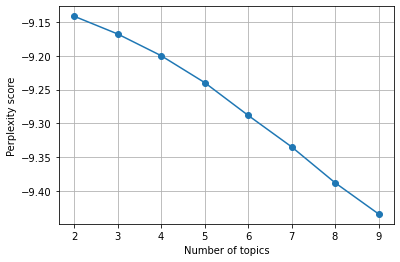

In [18]:
x = range(2,10)
plt.plot(x, perplexity_values, marker = 'o')
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.grid()
plt.show()

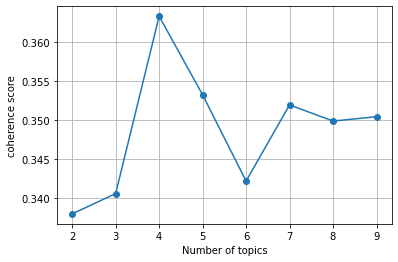

In [19]:
x = range(2,10)
plt.plot(x, coherence_values, marker = 'o')
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.grid()
plt.show()

In [20]:
print('topic : 7\n perplexity_score : {0:.4f}\n coherence_score : {1:.4f} \n\n'.format(perplexity_values[5], coherence_values[5]))
print('topic : 9\n perplexity_score : {0:.4f}\n coherence_score : {1:.4f} \n\n'.format(perplexity_values[-1], coherence_values[-1]))

topic : 7
 perplexity_score : -9.3345
 coherence_score : 0.3520 


topic : 9
 perplexity_score : -9.4336
 coherence_score : 0.3504 




#### 토픽 수 후보로 coherence 상위권 2개인 7개 / 9개를 골랐다. perplexity 점수 차이는 0.1 이내

### 시각화

In [21]:
import pyLDAvis
import pyLDAvis.gensim

## 토픽 개수가 9개일 때는, 토픽 1,2,3이 겹쳐져있어 일정부분 겹쳐져 있다

In [22]:
pyLDAvis.enable_notebook()

model_9 = models.ldamodel.LdaModel(corpus, num_topics=9, id2word = dictionary, random_state = 100)

data = pyLDAvis.gensim.prepare(model_9, corpus, dictionary)
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.038295  0.006500       1        1  25.027826
6     -0.031033 -0.002654       2        1  20.469555
2     -0.053258 -0.032725       3        1  16.811541
3     -0.043552 -0.008859       4        1  16.072205
1     -0.003589  0.075275       5        1  13.829001
5     -0.002826 -0.009737       6        1   6.335656
4      0.052725  0.004102       7        1   0.765973
7      0.057309 -0.011244       8        1   0.562870
0      0.062519 -0.020657       9        1   0.125369, topic_info=     Term          Freq         Total Category  logprob  loglift
144    시간  13458.000000  13458.000000  Default  30.0000  30.0000
43     생각  13947.000000  13947.000000  Default  29.0000  29.0000
135     밥  11692.000000  11692.000000  Default  28.0000  28.0000
167    하나   8564.000000   8564.000000  Default  27.0000  27.0000
1084   친구   8615.000000   8615.000000  Default  26.0000  26.0000
...   ...           ...           ...      ...      ...      ...
76      일      6.462541   8907.323242   Topic9  -6.2874  -0.5469
107    한번      5.843189   6890.514648   Topic9  -6.3881  -0.3910
777    알바      5.762133   6568.154785   Topic9  -6.4021  -0.3570
56     어디      5.897617   7411.419922   Topic9  -6.3789  -0.4546
804    언제      5.215815   5998.999023   Topic9  -6.5017  -0.3660

[839 rows x 6 columns], token_table=       Topic      Freq Term
term                       
0          1  0.246265   가면
0          2  0.150971   가면
0          3  0.295250   가면
0          4  0.120188   가면
0          5  0.125542   가면
...      ...       ...  ...
86089      2  0.883019  후시딘
3632       4  0.976533   훨신
52248      5  0.910024  흐릿해
41213      2  0.076458  히오스
41213      5  0.917491  히오스

[2757 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 3, 4, 2, 6, 5, 8, 1])

In [23]:
pyLDAvis.enable_notebook()

model_8 = models.ldamodel.LdaModel(corpus, num_topics=8, id2word = dictionary, random_state = 100)

data = pyLDAvis.gensim.prepare(model_8, corpus, dictionary)
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.028945 -0.004714       1        1  25.903719
3     -0.043304  0.004453       2        1  22.207771
2     -0.049188  0.021402       3        1  20.874500
1      0.011142 -0.062525       4        1  15.821915
5     -0.007053 -0.000849       5        1   9.757615
4      0.032483 -0.000082       6        1   3.761408
7      0.041963  0.013849       7        1   1.241259
0      0.042902  0.028467       8        1   0.431818, topic_info=    Term          Freq         Total Category  logprob  loglift
144   시간  13595.000000  13595.000000  Default  30.0000  30.0000
135    밥  12365.000000  12365.000000  Default  29.0000  29.0000
514    맛  10101.000000  10101.000000  Default  28.0000  28.0000
951   자기   5444.000000   5444.000000  Default  27.0000  27.0000
43    생각  13805.000000  13805.000000  Default  26.0000  26.0000
..   ...           ...           ...      ...      ...      ...
118   그게     20.236353   5331.781738   Topic8  -6.3827  -0.1290
12    그때     19.106583   4628.418457   Topic8  -6.4401  -0.0450
804   언제     20.758589   6010.345703   Topic8  -6.3572  -0.2234
151   요즘     20.517208   6592.637695   Topic8  -6.3689  -0.3275
504    막     19.075493   6116.955078   Topic8  -6.4417  -0.3255

[755 rows x 6 columns], token_table=       Topic      Freq Term
term                       
0          1  0.199424   가면
0          2  0.175978   가면
0          3  0.347913   가면
0          4  0.154688   가면
0          5  0.077883   가면
...      ...       ...  ...
1215       8  0.004362    후
3632       1  0.029310   훨신
3632       2  0.937930   훨신
3632       3  0.029310   훨신
52248      4  0.993342  흐릿해

[2439 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 3, 2, 6, 5, 8, 1])

In [24]:
pyLDAvis.enable_notebook()

model_6 = models.ldamodel.LdaModel(corpus, num_topics=6, id2word = dictionary, random_state = 100)

data = pyLDAvis.gensim.prepare(model_6, corpus, dictionary)
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.024137 -0.009719       1        1  24.685835
2     -0.038249 -0.004031       2        1  24.644114
1      0.034727 -0.031501       3        1  19.218845
5     -0.007953 -0.005364       4        1  19.218624
4      0.031943  0.016864       5        1   8.547935
0      0.003669  0.033751       6        1   3.684654, topic_info=    Term          Freq         Total Category  logprob  loglift
951   자기   5711.000000   5711.000000  Default  30.0000  30.0000
144   시간  13599.000000  13599.000000  Default  29.0000  29.0000
135    밥  12268.000000  12268.000000  Default  28.0000  28.0000
153   웅웅   3707.000000   3707.000000  Default  27.0000  27.0000
338   내일   7928.000000   7928.000000  Default  26.0000  26.0000
..   ...           ...           ...      ...      ...      ...
986   정도    200.511246   6448.751465   Topic6  -6.2332  -0.1698
76     일    225.579117   8968.147461   Topic6  -6.1154  -0.3818
107   한번    200.756424   7114.501953   Topic6  -6.2320  -0.2668
118   그게    179.853546   5282.424805   Topic6  -6.3419  -0.0790
504    막    174.083237   5993.689941   Topic6  -6.3745  -0.2379

[591 rows x 6 columns], token_table=       Topic      Freq Term
term                       
0          1  0.192605   가면
0          2  0.382494   가면
0          3  0.188802   가면
0          4  0.150498   가면
0          5  0.064383   가면
...      ...       ...  ...
3632       4  0.061066   훨신
52248      3  0.928776  흐릿해
41213      2  0.040424  히오스
41213      3  0.929755  히오스
41213      4  0.040424  히오스

[1835 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 6, 5, 1])

## 그나마 토픽이 7개일 때, 토픽 1안에 3과 7이 포함되어있고 2와 4가 상당 부분 겹쳐져 있어 좋은 분류는 아닌거 같다

In [25]:
pyLDAvis.enable_notebook()

model_7 = models.ldamodel.LdaModel(corpus, num_topics=7, id2word = dictionary, random_state = 100)

data = pyLDAvis.gensim.prepare(model_7, corpus, dictionary)
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.019602  0.015139       1        1  26.671257
3      0.035217  0.002365       2        1  20.042665
2      0.045334 -0.007607       3        1  20.035486
1     -0.036668  0.050178       4        1  16.452053
5      0.002336 -0.002112       5        1  10.563950
4     -0.036652 -0.015904       6        1   5.331643
0     -0.029168 -0.042059       7        1   0.902949, topic_info=    Term          Freq         Total Category  logprob  loglift
144   시간  13579.000000  13579.000000  Default  30.0000  30.0000
951   자기   5548.000000   5548.000000  Default  29.0000  29.0000
135    밥  12340.000000  12340.000000  Default  28.0000  28.0000
153   웅웅   3581.000000   3581.000000  Default  27.0000  27.0000
43    생각  13706.000000  13706.000000  Default  26.0000  26.0000
..   ...           ...           ...      ...      ...      ...
107   한번     49.265072   7063.563965   Topic7  -6.2306  -0.2582
76     일     52.920837   9006.384766   Topic7  -6.1590  -0.4296
804   언제     43.815559   5926.516602   Topic7  -6.3478  -0.1999
151   요즘     42.309902   6629.494629   Topic7  -6.3828  -0.3470
504    막     40.186531   6025.251953   Topic7  -6.4343  -0.3029

[688 rows x 6 columns], token_table=       Topic      Freq Term
term                       
0          1  0.198652   가면
0          2  0.168277   가면
0          3  0.336015   가면
0          4  0.164513   가면
0          5  0.086289   가면
...      ...       ...  ...
1215       7  0.009300    후
3632       1  0.062956   훨신
3632       2  0.881381   훨신
3632       5  0.031478   훨신
52248      4  0.924828  흐릿해

[2286 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 3, 2, 6, 5, 1])

In [26]:
nTopics = 9

# model_9

word_dict = {}
for i in range(nTopics):
  words = model_9.show_topic(i, topn=20)
  word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
  word_df_9 = pd.DataFrame(word_dict)

In [27]:
word_df_9

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08,Topic #09
0,시간,시간,생각,생각,생각,생각,맛,친구,밥
1,생각,영화,일단,돈,시간,운동,생각,시간,시간
2,웅웅,일,돈,시간,하나,시간,밥,밥,맛
3,밥,요즘,시간,학교,한번,맛,시간,생각,돈
4,하나,생각,알바,막,어제,날,하나,맛,생각
5,어제,점심,여행,하나,웅웅,내일,어제,일,자기
6,돈,밥,음,음,얘기,알바,보고,하나,내일
7,맛,퇴근,친구,친구,돈,돈,친구,돈,일
8,내일,가요,어디,공부,날,한번,내일,혼자,하나
9,자기,친구,사진,일단,일,밥,요즘,어제,어디


In [28]:
model_9.show_topics()

[(0,
  '0.004*"시간" + 0.003*"생각" + 0.003*"웅웅" + 0.003*"밥" + 0.002*"하나" + 0.002*"어제" + 0.002*"돈" + 0.002*"맛" + 0.002*"내일" + 0.002*"자기"'),
 (1,
  '0.007*"시간" + 0.006*"영화" + 0.005*"일" + 0.005*"요즘" + 0.005*"생각" + 0.005*"점심" + 0.004*"밥" + 0.004*"퇴근" + 0.004*"가요" + 0.004*"친구"'),
 (2,
  '0.006*"생각" + 0.005*"일단" + 0.005*"돈" + 0.005*"시간" + 0.005*"알바" + 0.003*"여행" + 0.003*"음" + 0.003*"친구" + 0.003*"어디" + 0.003*"사진"'),
 (3,
  '0.006*"생각" + 0.005*"돈" + 0.004*"시간" + 0.004*"학교" + 0.004*"막" + 0.003*"하나" + 0.003*"음" + 0.003*"친구" + 0.003*"공부" + 0.003*"일단"'),
 (4,
  '0.005*"생각" + 0.003*"시간" + 0.003*"하나" + 0.003*"한번" + 0.003*"어제" + 0.003*"웅웅" + 0.003*"얘기" + 0.002*"돈" + 0.002*"날" + 0.002*"일"'),
 (5,
  '0.006*"생각" + 0.005*"운동" + 0.004*"시간" + 0.003*"맛" + 0.003*"날" + 0.003*"내일" + 0.003*"알바" + 0.003*"돈" + 0.003*"한번" + 0.003*"밥"'),
 (6,
  '0.005*"맛" + 0.005*"생각" + 0.004*"밥" + 0.003*"시간" + 0.003*"하나" + 0.003*"어제" + 0.003*"보고" + 0.003*"친구" + 0.003*"내일" + 0.003*"요즘"'),
 (7,
  '0.004*"친구" + 0.004*"시간" + 0.003*"밥" + 

In [29]:
nTopics = 7

# model_7

word_dict = {}
for i in range(nTopics):
  words = model_7.show_topic(i, topn=20)
  word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
  word_df_7 = pd.DataFrame(word_dict)

In [30]:
word_df_7

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07
0,시간,시간,생각,생각,자기,맛,밥
1,웅웅,밥,돈,돈,밥,밥,맛
2,밥,일,시간,시간,생각,생각,생각
3,생각,영화,일단,학교,시간,시간,시간
4,자기,요즘,알바,하나,웅웅,자기,하나
5,하나,생각,친구,음,하나,내일,내일
6,돈,점심,밥,막,한번,한번,보고
7,내일,맛,어디,친구,내일,일,어제
8,맛,친구,내일,일단,일,돈,일
9,어제,퇴근,음,알바,돈,날,친구


In [31]:
model_7.show_topics()

[(0,
  '0.005*"시간" + 0.003*"웅웅" + 0.003*"밥" + 0.003*"생각" + 0.003*"자기" + 0.003*"하나" + 0.003*"돈" + 0.003*"내일" + 0.002*"맛" + 0.002*"어제"'),
 (1,
  '0.007*"시간" + 0.006*"밥" + 0.005*"일" + 0.005*"영화" + 0.005*"요즘" + 0.005*"생각" + 0.004*"점심" + 0.004*"맛" + 0.003*"친구" + 0.003*"퇴근"'),
 (2,
  '0.006*"생각" + 0.005*"돈" + 0.005*"시간" + 0.005*"일단" + 0.004*"알바" + 0.003*"친구" + 0.003*"밥" + 0.003*"어디" + 0.003*"내일" + 0.003*"음"'),
 (3,
  '0.005*"생각" + 0.005*"돈" + 0.005*"시간" + 0.004*"학교" + 0.003*"하나" + 0.003*"음" + 0.003*"막" + 0.003*"친구" + 0.003*"일단" + 0.003*"알바"'),
 (4,
  '0.006*"자기" + 0.005*"밥" + 0.004*"생각" + 0.004*"시간" + 0.004*"웅웅" + 0.003*"하나" + 0.003*"한번" + 0.003*"내일" + 0.003*"일" + 0.003*"돈"'),
 (5,
  '0.005*"맛" + 0.005*"밥" + 0.005*"생각" + 0.004*"시간" + 0.004*"자기" + 0.004*"내일" + 0.003*"한번" + 0.003*"일" + 0.003*"돈" + 0.003*"날"'),
 (6,
  '0.006*"밥" + 0.005*"맛" + 0.004*"생각" + 0.004*"시간" + 0.003*"하나" + 0.003*"내일" + 0.003*"보고" + 0.003*"어제" + 0.003*"일" + 0.003*"친구"')]